# 1. Data Cleaning

---



### Import all the necessary library 


In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


#### Read the datset from CSV File

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/spam_ham_dataset.csv')

Print first five rows in dataset

In [4]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


Drop the unnecessary coloumn

In [5]:
df.drop(columns= ['Unnamed: 0','label_num'],inplace=True)

In [6]:
df.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


#### Using Sklearn Encode tha categorical label  int0 Numerical label

In [7]:
encoder = LabelEncoder()
df.label = encoder.fit_transform(df.label)

In [8]:
df.head()

,label,text
0,0,Subject: enron methanol ; meter # : 988291\r\n...
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,1,"Subject: photoshop , windows , office . cheap ..."
4,0,Subject: re : indian springs\r\nthis deal is t...


#### Find the null value

In [9]:
df.isnull().sum()

label    0
text     0
dtype: int64

Find the Duplicate data 

In [10]:
df.duplicated().sum()

178

In [11]:
df.shape

(5171, 2)

#### Remove the duplicate

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(4993, 2)

# 2. EDA

---



In [15]:
df.label.value_counts()

0    3531
1    1462
Name: label, dtype: int64

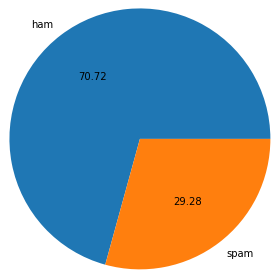

In [16]:
plt.pie(df.label.value_counts(),labels = ['ham','spam'],autopct = "%0.2f",radius = 1.5)
plt.show()

### Data is Imbalance

Import nltk library for text preprocessing


In [17]:
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

creat new cloumn for count no. of character in text

In [19]:
df['num_character'] = df.text.apply(len)

In [20]:
df.head()

,label,text,num_character
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524
3,1,"Subject: photoshop , windows , office . cheap ...",414
4,0,Subject: re : indian springs\r\nthis deal is t...,336


Count number of words in sentence

In [21]:
df['num_words']= df.text.apply(lambda x : len(nltk.word_tokenize(x)))

In [22]:
df.head()

,label,text,num_character,num_words
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551
3,1,"Subject: photoshop , windows , office . cheap ...",414,49
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71


In [23]:
df['sent_count']= df.text.apply(lambda x : len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,label,text,num_character,num_words,sent_count
0,0,Subject: enron methanol ; meter # : 988291\r\n...,327,68,3
1,0,"Subject: hpl nom for january 9 , 2001\r\n( see...",97,24,1
2,0,"Subject: neon retreat\r\nho ho ho , we ' re ar...",2524,551,20
3,1,"Subject: photoshop , windows , office . cheap ...",414,49,3
4,0,Subject: re : indian springs\r\nthis deal is t...,336,71,3


In [25]:
df[['num_character','num_words','sent_count']].describe()

,num_character,num_words,sent_count
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,233.678149,10.202884
std,1547.863387,340.702932,22.003030
min,11.000000,2.000000,1.000000
25%,256.000000,55.000000,3.000000
50%,557.000000,125.000000,6.000000
75%,1262.000000,288.000000,12.000000
max,32258.000000,8863.000000,1163.000000


Descibe for ham message



In [26]:
df[df.label==0][['num_character','num_words', 'sent_count']].describe()

,num_character,num_words,sent_count
count,3531.000000,3531.000000,3531.000000
mean,994.939394,230.516001,8.804871
std,1402.785831,337.018933,22.303918
min,18.000000,3.000000,1.000000
25%,241.000000,53.000000,3.000000
50%,538.000000,128.000000,5.000000
75%,1253.500000,298.500000,10.000000
max,32258.000000,8863.000000,1163.000000


Descibe for spam message

In [27]:
df[df.label==1][['num_character','num_words', 'sent_count']].describe()

,num_character,num_words,sent_count
count,1462.000000,1462.000000,1462.000000
mean,1249.326265,241.315321,13.579343
std,1840.112883,349.439381,20.883535
min,11.000000,2.000000,1.000000
25%,304.250000,60.000000,3.000000
50%,589.000000,119.500000,8.000000
75%,1305.000000,252.750000,15.000000
max,22073.000000,3963.000000,331.000000


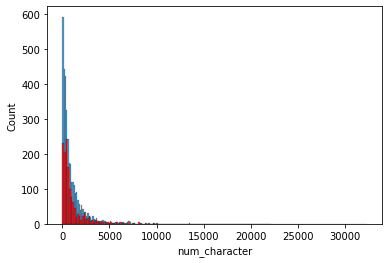

<Figure size 864x432 with 0 Axes>

In [28]:
sns.histplot(df[df['label']==0]['num_character'])
sns.histplot(df[df['label']==1]['num_character'], color='red')
plt.figure(figsize=(12,6))
plt.show()

We can clearly see length of spam message is more as compare to ham message 

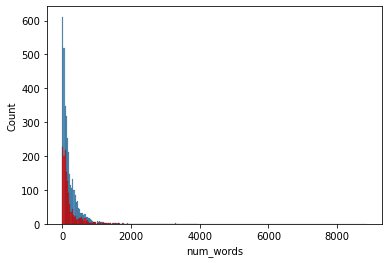

<Figure size 864x432 with 0 Axes>

In [29]:
sns.histplot(df[df['label']==0]['num_words'])
sns.histplot(df[df['label']==1]['num_words'], color='red')
plt.figure(figsize=(12,6))
plt.show()

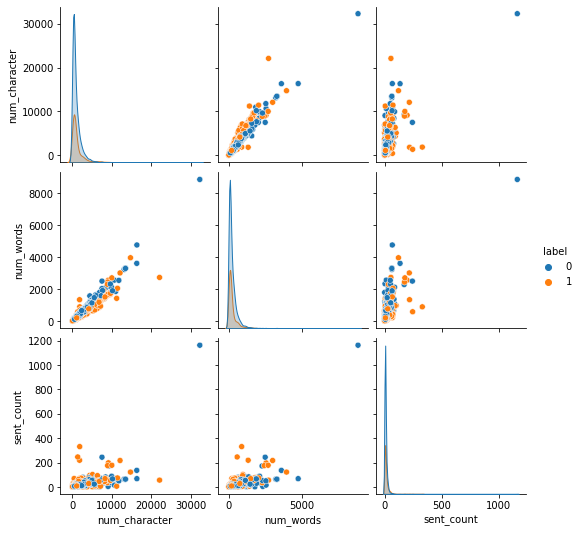

In [30]:
sns.pairplot(df,hue='label')

<Figure size 864x432 with 0 Axes>

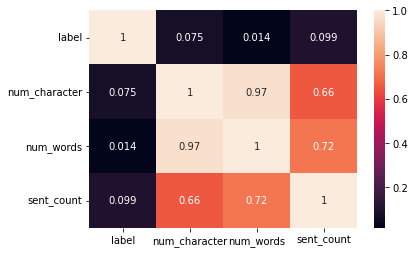

<Figure size 864x432 with 0 Axes>

In [31]:
sns.heatmap(df.corr(),annot = True)
plt.figure(figsize=(12,6))

After heatmap we get the conclusion in this datset multicolinearity is present between num_character , num_words , sent_count

# 3. **Text Preprocessing**

*   Lower Case
*   Tokenization
*   Removing Special Characters
*   Removing Stop Words and punctuation
*   Stemming 



In [32]:
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

String Punctuation

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

for stemming we use porterstemmer

In [34]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

#### Fuction for complete text preprocessing

In [36]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text :
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english')and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)

In [37]:
# test function 
transform_text('did you like my presentation on ML.how abut this presentation?')

'like present abut present'

In [38]:
df['transformed_text'] = df['text'].apply(transform_text)

using wordcloud we interpret the word that used in spam and ham

In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [40]:
spam_wc = wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=" "))

word that is used in spam

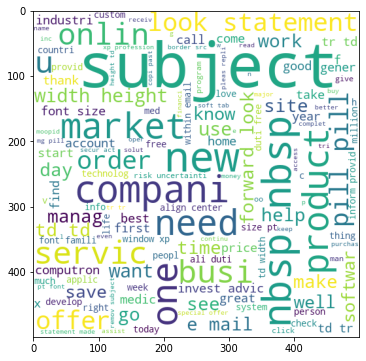

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.show()

In [42]:
ham_wc = wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=" "))

word used in ham

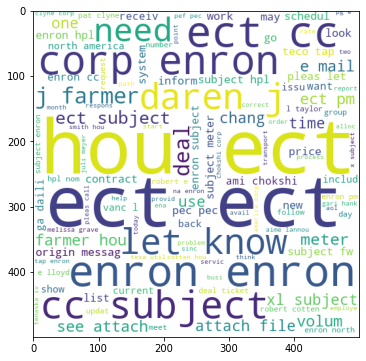

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)
plt.show()

list of all word in spam

In [44]:
spam_corpus=[]
for msg in df[df.label == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [45]:
len(spam_corpus)

196592

count most 30 occurence of word in spam


In [46]:
from collections import Counter
Counter(spam_corpus)

Counter({'subject': 1622,
         'photoshop': 80,
         'window': 220,
         'offic': 257,
         'cheap': 78,
         'main': 18,
         'trend': 10,
         'abas': 1,
         'darer': 1,
         'prudent': 3,
         'fortuit': 2,
         'undergon': 1,
         'lightheart': 1,
         'charm': 2,
         'orinoco': 1,
         'taster': 1,
         'railroad': 3,
         'affluent': 2,
         'pornograph': 4,
         'cuvier': 1,
         'irvin': 1,
         'parkhous': 1,
         'blameworthi': 1,
         'chlorophyl': 1,
         'robe': 1,
         'diagrammat': 2,
         'fogarti': 1,
         'clear': 26,
         'bayda': 2,
         'inconvenienc': 1,
         'manag': 161,
         'repres': 95,
         'smart': 25,
         'hashish': 2,
         'academi': 2,
         'sharehold': 52,
         'unload': 3,
         'bad': 38,
         'danielson': 1,
         'pure': 5,
         'caffein': 8,
         'spaniard': 3,
         'chargeabl': 2,


Bargraph of most 30 occurent word in spam

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


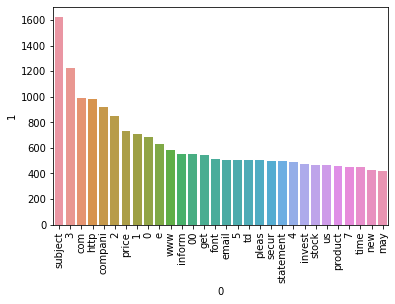

In [47]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show(12,10)

List of all word in ham

In [48]:
ham_corpus=[]
for msg in df[df.label == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)

In [49]:
len(ham_corpus)

380475

count of all word in Ham

In [50]:
from collections import Counter
Counter(ham_corpus)

Counter({'subject': 6210,
         'enron': 6442,
         'methanol': 121,
         'meter': 2709,
         '988291': 3,
         'follow': 833,
         'note': 306,
         'gave': 45,
         'monday': 254,
         '4': 1069,
         '3': 1663,
         '00': 1795,
         'preliminari': 52,
         'flow': 937,
         'data': 193,
         'provid': 340,
         'daren': 1837,
         'pleas': 2675,
         'overrid': 11,
         'pop': 180,
         'daili': 508,
         'volum': 1645,
         'present': 107,
         'zero': 202,
         'reflect': 178,
         'activ': 416,
         'obtain': 31,
         'ga': 2784,
         'control': 193,
         'chang': 1236,
         'need': 1690,
         'asap': 68,
         'econom': 28,
         'purpos': 64,
         'hpl': 2291,
         'nom': 1155,
         'januari': 356,
         '9': 661,
         '2001': 1988,
         'see': 986,
         'attach': 1118,
         'file': 718,
         'hplnol': 48,
         '

Bar graph of frequency of most 30 occurent word in ham

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


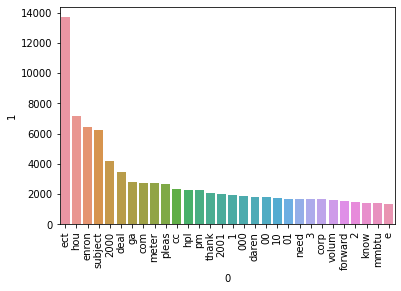

In [51]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show(12,10)

# 4. **Model Buiding**

In [52]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)


In [53]:
x = tfidf.fit_transform(df['transformed_text']).toarray()

In [54]:
x = np.hstack((x,df['num_character'].values.reshape(-1,1)))

In [55]:
print(x.shape)

(4993, 3001)


In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [57]:
y = df['label'].values

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
x_train , x_test , y_train , y_test = train_test_split(x,y,train_size = 0.2,random_state=2)

In [60]:
print(x_train.shape,y_train.shape)

(998, 3001) (998,)


In [61]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [62]:
gnb = GaussianNB()
Mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(x_train , y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.9259073842302878
[[2641  170]
 [ 126 1058]]
0.8615635179153095


In [64]:
Mnb.fit(x_train , y_train)
y_pred2 = Mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9341677096370463
[[2607  204]
 [  59 1125]]
0.8465011286681715


In [65]:
bnb.fit(x_train , y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.8763454317897371
[[2601  210]
 [ 284  900]]
0.8108108108108109


In [66]:
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [67]:
svc = SVC(kernel='sigmoid',gamma=0.1)
etc = ExtraTreesClassifier(n_estimators=50 , random_state=2)
mnb = MultinomialNB()

In [68]:
# Apply stemming
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()


In [69]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [70]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print('accuracy score',accuracy_score(y_test,y_pred))
print('precision score' , precision_score(y_test,y_pred))
print('confusion_matrix')
print('')
confusion_matrix(y_test,y_pred)

accuracy score 0.9536921151439299
precision score 0.899919935948759
confusion_matrix



array([[2686,  125],
       [  60, 1124]])